# Autoencoder Models Performance Analysis

## Notebook Overview 
The purpose of this notebook is to analyze the performance of various Autoencoder architectures through training and evaluation (T&E hereafter) on the CityLearn Challenge 2023 dataset.

### Imports
This section imports essential libraries used throughout the notebook and adds the 'src' directory to the system path to allow importing modules from the source folder. 

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
# Getting src path to import modules
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Adding src path to the system path, if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

from dl_models import AutoencoderBasic as aeb
from dl_models import AutoencoderAdvanced as aea
from dl_models import AutoencoderRefined as aer

## Introductory test
As an initial approach to the model, this T&E will be performed on the samples from Building 1 of the dataset, targeting three features:
- Cooling demand
- Carbon intensity
- Solar generation

In this case, the baseline Autoencoder is adopted, a simple architecture composed of one encoder layer and one decoder layer, each with 64 neurons and linear activation functions.
One plot for each target is generated, highlighting the NMAE, NMSE, and NRMSE, to enable comparison with the normalized performance of other models considered in the project.

In [2]:
# Time series data for a specific building (Building_1.csv/Building_2.csv/Building_3.csv).
electricity_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")

# Carbon intensity data.
carbon_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Pricing data.
pricing_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/pricing.csv")

# Weather data.
weather_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/weather.csv")

# Concatenate multiple datasets along the columns to create a single dataset.
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

# Displaying the last 5 samples of the dataframe to show its structure.
df.tail()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
715,6,20,6,0,24.468618,0.024173,54.277103,0.442291,0.398354,5.189857,...,32.905895,89.465866,73.861000,40.875510,0.0,110.15520,0.0,0.0,271.32200,0.0
716,6,21,6,0,24.444859,0.000415,54.351337,0.990416,0.199180,4.550693,...,32.669003,87.158066,66.389130,64.036320,0.0,216.20418,0.0,0.0,151.80556,0.0
717,6,22,6,0,24.444464,0.000019,54.532566,1.563732,0.000000,4.043389,...,29.979940,100.000000,58.228535,51.990180,0.0,259.28485,0.0,0.0,374.21823,0.0
718,6,23,6,0,24.444452,0.000009,54.647182,0.421510,0.000000,3.268111,...,28.337627,90.768420,35.361465,60.445404,0.0,272.40073,0.0,0.0,582.50290,0.0
719,6,24,6,0,21.812447,0.145780,63.234272,0.374985,0.000000,6.492827,...,25.415920,82.899440,47.129494,56.078560,0.0,129.96535,0.0,0.0,842.14680,0.0


In [3]:
# Target features to forecast
targets = ['cooling_demand', 'carbon_intensity', 'solar_generation']

# List of features used for training the autoencoder.
features = ['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 
            'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 
            'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h']

In [4]:
real_1, pred_1 = aeb.Autoencoder(dataframe=df, features=features, epochs = 1000, batch_size=256)

Epoch 1/1000
2/2 [==============================] - 1s 5ms/step - loss: 0.1474 - mean_absolute_error: 0.3351
Epoch 2/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1336 - mean_absolute_error: 0.3200
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1213 - mean_absolute_error: 0.3054
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1101 - mean_absolute_error: 0.2908
Epoch 5/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0995 - mean_absolute_error: 0.2758
Epoch 6/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0896 - mean_absolute_error: 0.2602
Epoch 7/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0805 - mean_absolute_error: 0.2443
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0722 - mean_absolute_error: 0.2284
Epoch 9/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0650 - mean_absolute_error: 0.2132
Epoch 10/1000
2/2 [

In [5]:
def plot_all_target_comparisons(real, pred, targets, features, n_cols=2, figsize=(10, 10), percent=False):
    n_targets = len(targets)
    n_rows = int(np.ceil(n_targets / n_cols))

    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    axs = axs.flatten() if n_targets > 1 else [axs]

    for i, target in enumerate(targets):
        ax = axs[i]
        target_index = features.index(target)

        real_target = real[:, target_index]
        pred_target = pred[:, target_index]

        mae = np.abs(real_target - pred_target).mean()
        nmae = mae / (real_target.max() - real_target.min())
        nmse = ((real_target - pred_target) ** 2).mean() / np.var(real_target)
        nrmse = np.sqrt(((real_target - pred_target) ** 2).mean()) / (real_target.max() - real_target.min())

        if percent:
            nmae *= 100
            nmse *= 100
            nrmse *= 100
        
        ax.scatter(real_target, pred_target, alpha=0.6,
                   s=15, c=np.abs(real_target - pred_target), cmap='Spectral',
                   edgecolors='black',  linewidth=0.5,
                   label=f"NMAE={nmae:.3f}%\nNMSE={nmse:.3f}%\nNRMSE={nrmse:.3f}%")
        ax.plot([real_target.min(), real_target.max()],
                [real_target.min(), real_target.max()],
                'k-', linewidth=1)
        ax.set_title(f"Target: {target}")
        ax.set_xlabel("True")
        ax.set_ylabel("Predicted")
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.legend()

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

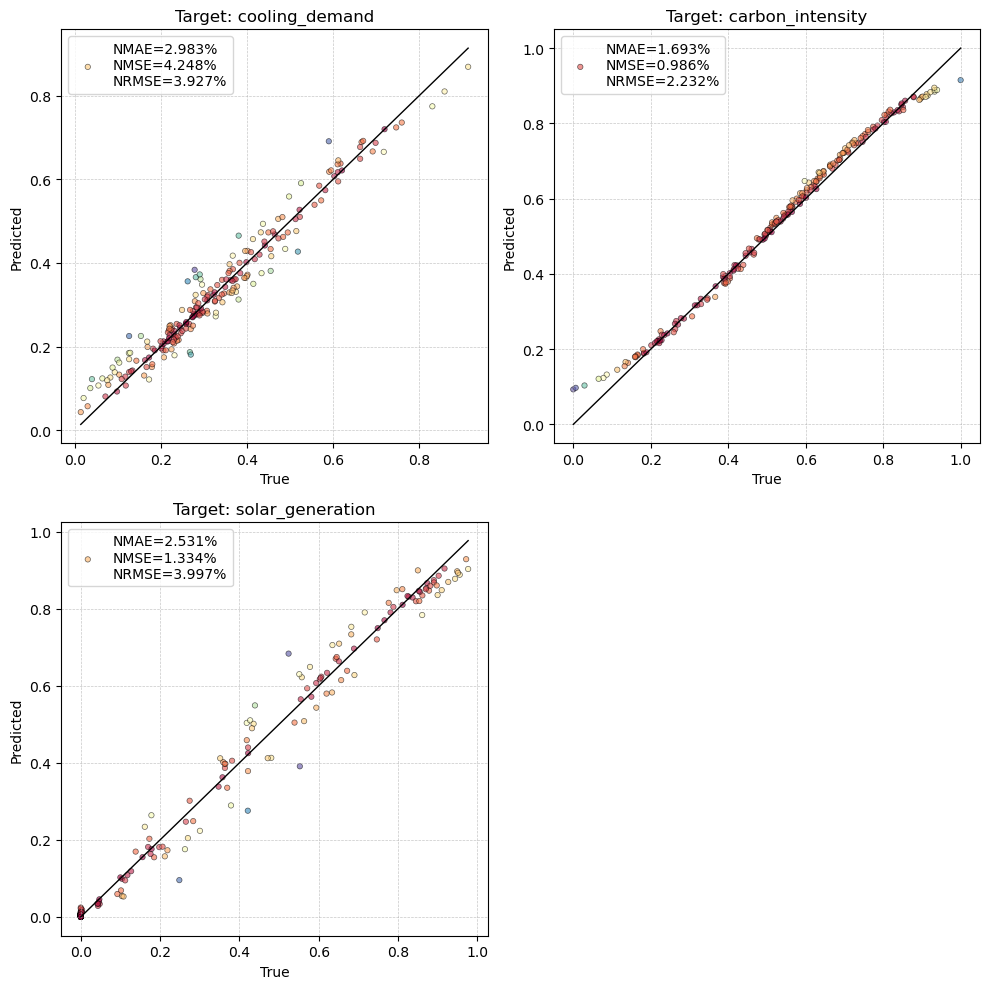

In [6]:
plot_all_target_comparisons(real_1, pred_1, targets, features, percent=True)

## Cross-building test
The targets and the model remain unchanged. For this phase, we will use 100% of the data from Building 1 for training, while the remaining two buildings, being triplets with the first, will be used to evaluate the model's performance.

In [7]:
## Time series data for all buildings
building_1_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")
building_2_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_2.csv")
building_3_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_3.csv")

# Concatenate train and test data
train_df = pd.concat([building_1_data, carbon_data, pricing_data, weather_data], axis=1)

# Concatenate the data from Building 2 and Building 3 vertically, creating a unified dataset for evaluation
building_2_3_data = pd.concat([building_2_data, building_3_data], axis=0, ignore_index=True)

# Combine carbon intensity, pricing, and weather data horizontally to align with building data
external_data = pd.concat([carbon_data, pricing_data, weather_data], axis=1)

# Repeat the external data (carbon, pricing, weather) to match the number of rows in Building 2 and 3 data
external_data_repeated = pd.concat([external_data] * 2, axis=0, ignore_index=True)

# Combine the building data and the repeated external data horizontally, preparing the final test dataset
test_df = pd.concat([building_2_3_data, external_data_repeated], axis=1)

In [8]:
train_df.tail()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
715,6,20,6,0,24.468618,0.024173,54.277103,0.442291,0.398354,5.189857,...,32.905895,89.465866,73.861000,40.875510,0.0,110.15520,0.0,0.0,271.32200,0.0
716,6,21,6,0,24.444859,0.000415,54.351337,0.990416,0.199180,4.550693,...,32.669003,87.158066,66.389130,64.036320,0.0,216.20418,0.0,0.0,151.80556,0.0
717,6,22,6,0,24.444464,0.000019,54.532566,1.563732,0.000000,4.043389,...,29.979940,100.000000,58.228535,51.990180,0.0,259.28485,0.0,0.0,374.21823,0.0
718,6,23,6,0,24.444452,0.000009,54.647182,0.421510,0.000000,3.268111,...,28.337627,90.768420,35.361465,60.445404,0.0,272.40073,0.0,0.0,582.50290,0.0
719,6,24,6,0,21.812447,0.145780,63.234272,0.374985,0.000000,6.492827,...,25.415920,82.899440,47.129494,56.078560,0.0,129.96535,0.0,0.0,842.14680,0.0


In [9]:
test_df.tail()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
1435,6,20,6,0,24.444447,0.000001,55.401950,0.981112,0.000000,3.581775,...,32.905895,89.465866,73.861000,40.875510,0.0,110.15520,0.0,0.0,271.32200,0.0
1436,6,21,6,0,24.444450,0.000005,55.363644,1.070561,0.000000,2.959194,...,32.669003,87.158066,66.389130,64.036320,0.0,216.20418,0.0,0.0,151.80556,0.0
1437,6,22,6,0,24.444450,0.000006,55.452953,0.816532,0.204833,2.480101,...,29.979940,100.000000,58.228535,51.990180,0.0,259.28485,0.0,0.0,374.21823,0.0
1438,6,23,6,0,24.444450,0.000006,55.501358,0.709542,1.768555,3.568882,...,28.337627,90.768420,35.361465,60.445404,0.0,272.40073,0.0,0.0,582.50290,0.0
1439,6,24,6,0,24.444440,-0.000004,55.706670,0.526549,0.000000,1.902680,...,25.415920,82.899440,47.129494,56.078560,0.0,129.96535,0.0,0.0,842.14680,0.0


In [10]:
real_2, pred_2 = aeb.Autoencoder(train_df=train_df, test_df=test_df, features=features, epochs = 1000, batch_size=256)

Epoch 1/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1612 - mean_absolute_error: 0.3513
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1356 - mean_absolute_error: 0.3246
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1152 - mean_absolute_error: 0.3002
Epoch 4/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0982 - mean_absolute_error: 0.2768
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0839 - mean_absolute_error: 0.2539
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0717 - mean_absolute_error: 0.2314
Epoch 7/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0618 - mean_absolute_error: 0.2101
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0541 - mean_absolute_error: 0.1912
Epoch 9/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0484 - mean_absolute_error: 0.1755
Epoch 10/1000
3/3 [

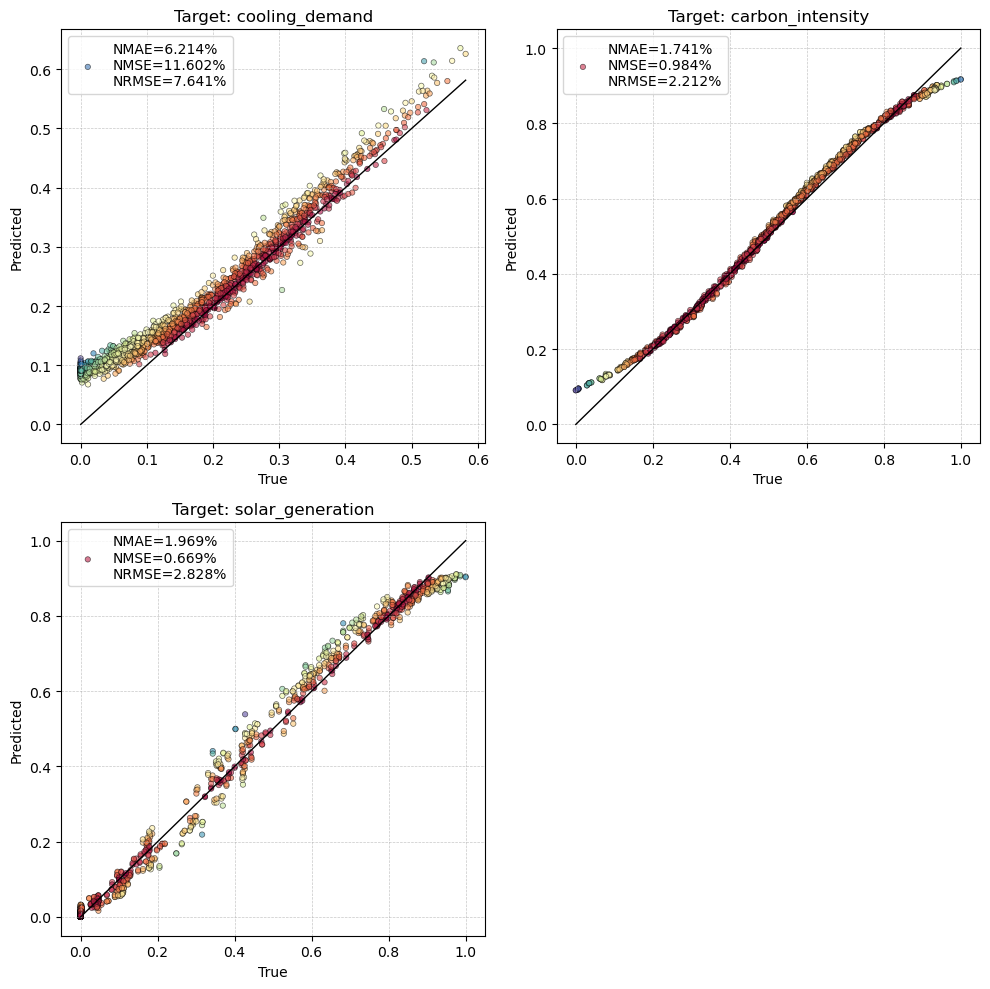

In [11]:
plot_all_target_comparisons(real_2, pred_2, targets, features, percent=True)

## Enhanced Architectures test
In this section, we evaluate the previous tests on a more advanced autoencoder architecture, designed to improve the model's ability to learn from complex data and potentially reduce errors. This architecture introduces deeper layers, different activation functions, and other optimizations aimed at enhancing performance over the previous model.

### Adding Hidden Layers

Now, two hidden layers are added to both the encoder and decoder in order to enhance the model’s representation capacity.

Encoder:
- Dense layer with 128 units and linear activation;
- Dense layer with 64 units and linear activation;
- Dense layer with 32 units and linear activation.

Bottleneck (latent) layer with n units and linear activation.

Decoder:
- Dense layer with 32 units and linear activation;
- Dense layer with 64 units and linear activation;
- Dense layer with 128 units and linear activation.

Output layer with a sigmoid activation to reconstruct the input.

This structure is designed to capture more complex relationships within the data while maintaining symmetry between the encoding and decoding paths.

In [12]:
real_3, pred_3 = aea.Autoencoder(dataframe=df, features=features, epochs = 500, batch_size = 64)

Epoch 1/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0869 - mean_absolute_error: 0.2414
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.1194
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.1021
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0900
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0812
Epoch 6/500
8/8 [==============================] - 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0742
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0680
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0631
Epoch 9/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0602
Epoch 10/500
8/8 [==========

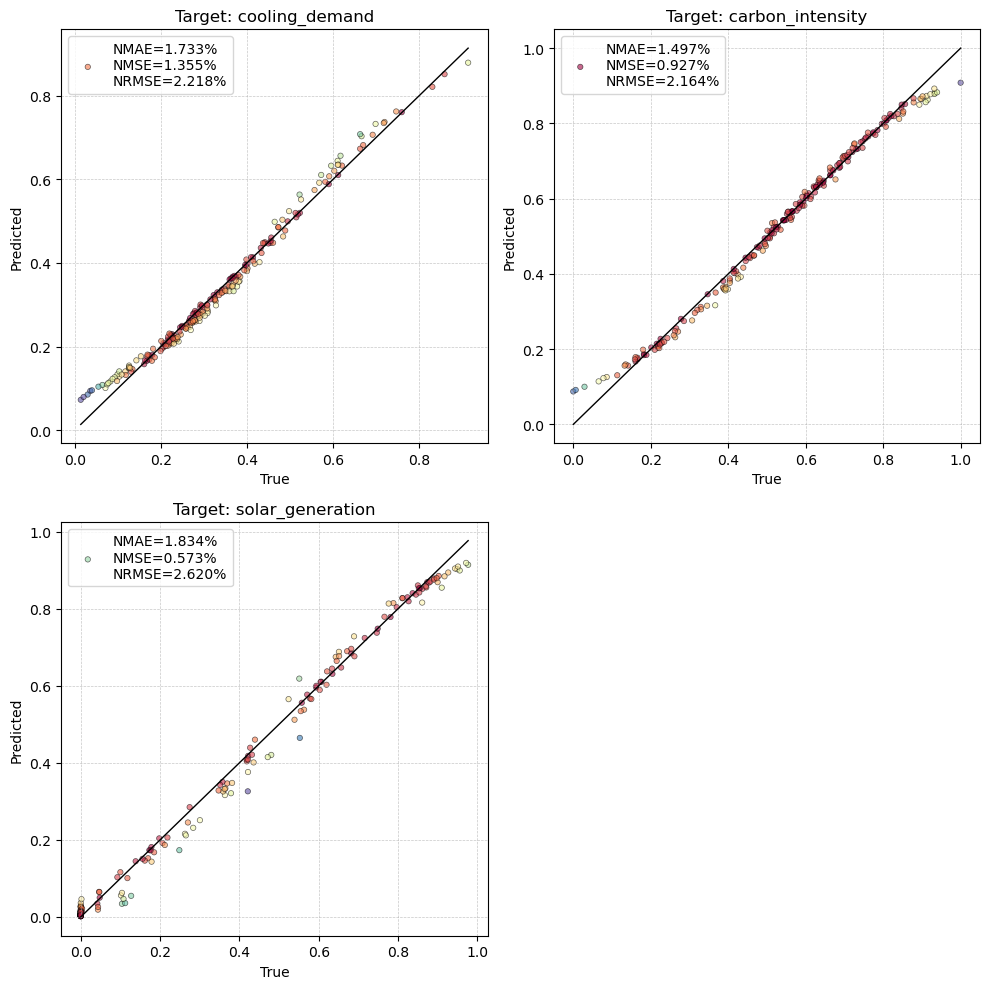

In [13]:
plot_all_target_comparisons(real_3, pred_3, targets, features, percent=True)

In [14]:
real_4, pred_4 = aea.Autoencoder(train_df=train_df, test_df=test_df, features=features, epochs = 500, batch_size = 64)

Epoch 1/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0649 - mean_absolute_error: 0.1866
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0302 - mean_absolute_error: 0.1066
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0203 - mean_absolute_error: 0.0919
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0141 - mean_absolute_error: 0.0780
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0109 - mean_absolute_error: 0.0672
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0092 - mean_absolute_error: 0.0614
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0081 - mean_absolute_error: 0.0579
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0072 - mean_absolute_error: 0.0547
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0066 - mean_absolute_error: 0.0521
Epoch 10/5

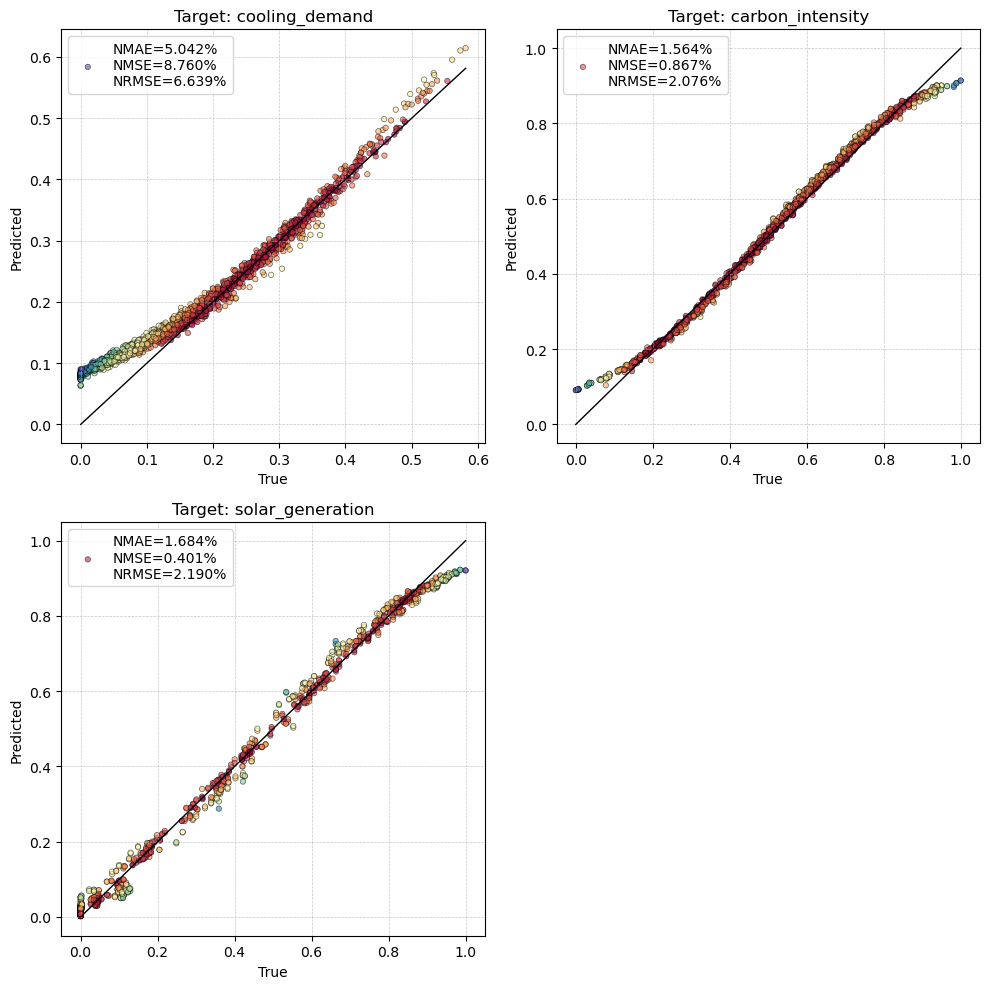

In [15]:
plot_all_target_comparisons(real_4, pred_4, targets, features, percent=True)

### Introducing Non Linear Activation Functions and Model Enhancements

To further improve the reconstruction performance, this section introduces non-linear activation functions (e.g. ReLU, ELU) within the hidden layers of the autoencoder. Additionally, the model configuration is enhanced by experimenting with a different optimizer, adjusting the dimensionality of the latent space and adding the batch normalization procedure after every layer. These changes aim to boost the model’s representation power and optimize its ability to reconstruct complex patterns in the input features.

In [16]:
real_5, pred_5 = aer.Autoencoder(dataframe=df, features=features, epochs = 3000, latent_dim = 32, batch_size = 128)

Epoch 1/3000
4/4 [==============================] - 0s 9ms/step - loss: 0.1392
Epoch 2/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.1283
Epoch 3/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.1173
Epoch 4/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.1049
Epoch 5/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0916
Epoch 6/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0790
Epoch 7/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0686
Epoch 8/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0615
Epoch 9/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0571
Epoch 10/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0548
Epoch 11/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0532
Epoch 12/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0518
Epoch 13/3000
4/4 [==============================

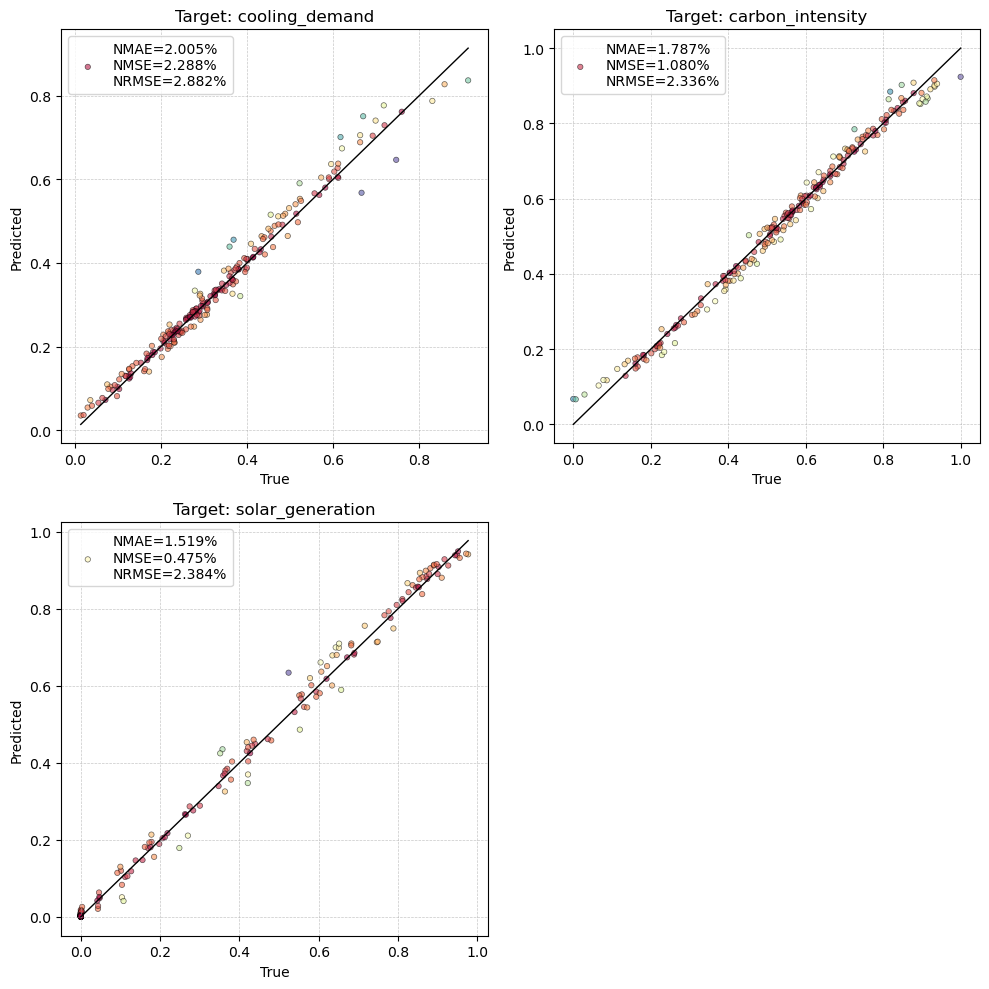

In [17]:
plot_all_target_comparisons(real_5, pred_5, targets, features, percent=True)

In [18]:
real_6, pred_6 = aer.Autoencoder(train_df=train_df, test_df=test_df, features=features, epochs = 3000, latent_dim = 32, batch_size = 128)

Epoch 1/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.1356
Epoch 2/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1222
Epoch 3/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.1054
Epoch 4/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.0858
Epoch 5/3000
6/6 [==============================] - 0s 8ms/step - loss: 0.0685
Epoch 6/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.0571
Epoch 7/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 8/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 9/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0428
Epoch 10/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0390
Epoch 11/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 12/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 13/3000
6/6 [==============================

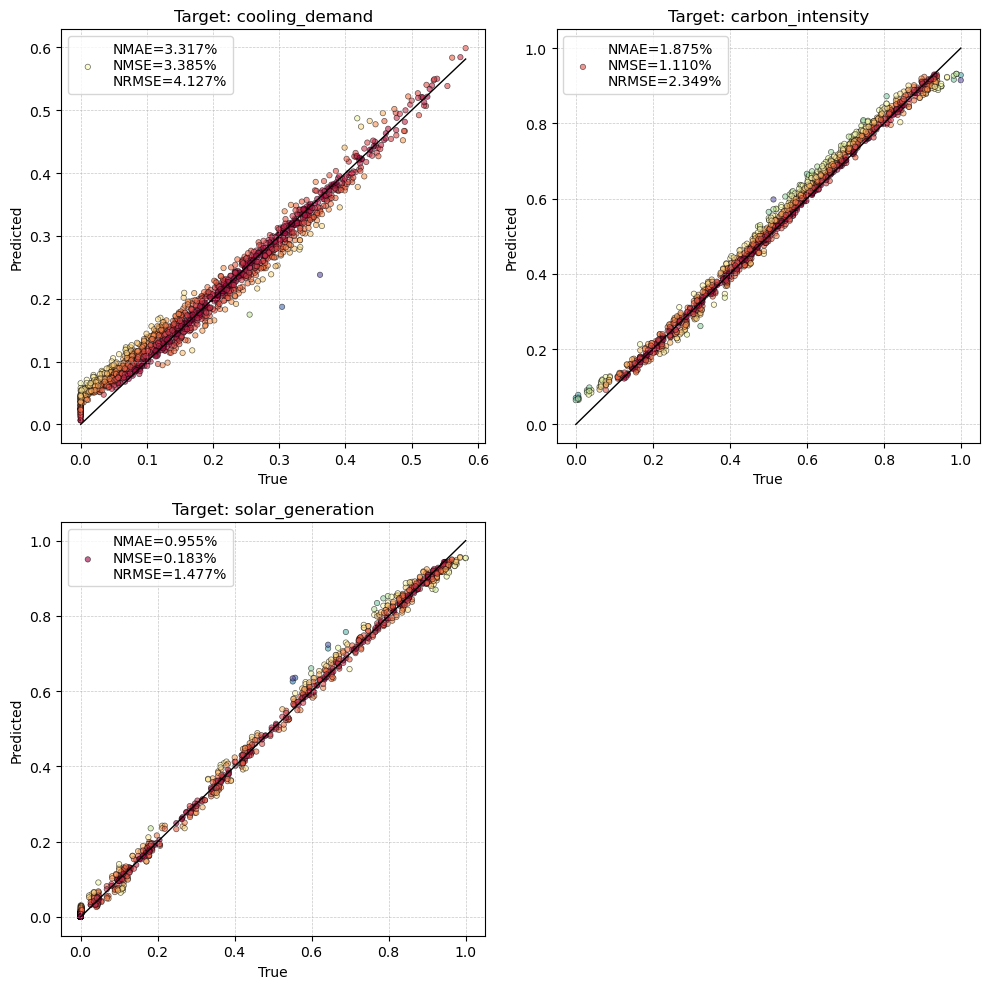

In [19]:
plot_all_target_comparisons(real_6, pred_6, targets, features, percent=True)

## Observations
Cooling demand exp, carbon insensity arctan, migliore performance del modello non lineare.

In [57]:
def plot_cooling_demand_expfit(real, pred, features, target="Cooling Demand", percent=False):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.optimize import curve_fit

    # Indice del target
    target_index = features.index(target)

    # Estrazione dati
    real_target = real[:, target_index]
    pred_target = pred[:, target_index]

    # Evita log(0)
    epsilon = 1e-6
    real_safe = np.maximum(real_target, epsilon)
    pred_safe = np.maximum(pred_target, epsilon)

    # Funzione esponenziale da fittare
    def exp_func(x, a, b):
        return a * np.exp(b * x)

    # Fitting della curva
    try:
        popt, _ = curve_fit(exp_func, real_safe, pred_safe, maxfev=10000)
        exp_line = exp_func(np.sort(real_safe), *popt)
    except RuntimeError:
        popt = None
        exp_line = None

    # Metriche di errore
    mae = np.abs(real_target - pred_target).mean()
    nmae = mae / (real_target.max() - real_target.min())
    nmse = ((real_target - pred_target) ** 2).mean() / np.var(real_target)
    nrmse = np.sqrt(((real_target - pred_target) ** 2).mean()) / (real_target.max() - real_target.min())

    if percent:
        nmae *= 100
        nmse *= 100
        nrmse *= 100

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(real_safe, pred_safe, alpha=0.6, s=20,
                c=np.abs(real_target - pred_target), cmap='Spectral',
                edgecolors='black', linewidth=0.5,
                label=f"NMAE={nmae:.3f}%\nNMSE={nmse:.3f}%\nNRMSE={nrmse:.3f}%")

    if exp_line is not None:
        plt.plot(np.sort(real_safe), exp_line, 'r--', linewidth=2,
                 label=f"Fitted Exp")

    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("Cooling Demand: True vs Predicted (with Exponential Fit)")
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()

    plt.tight_layout()
    plt.show()

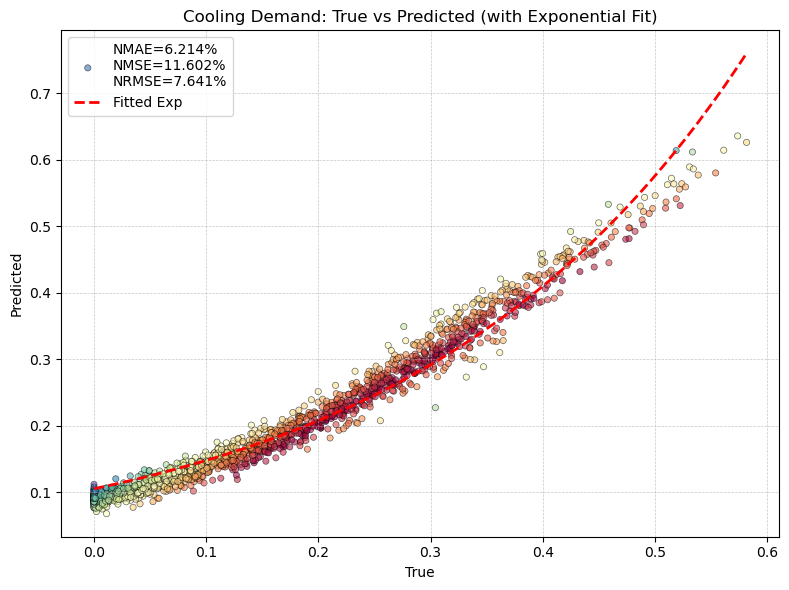

In [58]:
plot_cooling_demand_expfit(real=real_2, pred=pred_2, features=features, target=targets[0], percent=True)

In [61]:
def plot_carbon_intensity_arctanfit(real, pred, features, target="Carbon Intensity", percent=False):
    from scipy.optimize import curve_fit
    import matplotlib.pyplot as plt
    import numpy as np

    target_index = features.index(target)

    real_target = real[:, target_index]
    pred_target = pred[:, target_index]

    def arctan_func(x, a, b, c):
        return a * np.arctan(b * x) + c

    def fit_arctan(real_target, pred_target):
        # Normalizza i dati per stabilità numerica
        x = (real_target - np.mean(real_target)) / np.std(real_target)
        y = (pred_target - np.mean(pred_target)) / np.std(pred_target)
    
        # Stima iniziale dei parametri (p0): 
        # a = ampiezza, b = pendenza, c = offset
        p0 = [1.0, 1.0, 0.0]
    
        try:
            popt, _ = curve_fit(arctan_func, x, y, p0=p0, maxfev=20000)
            # Calcola la curva fittata sugli originali ordinati (non normalizzati)
            x_sorted = np.sort(real_target)
            x_norm = (x_sorted - np.mean(real_target)) / np.std(real_target)
            y_fit_norm = arctan_func(x_norm, *popt)
    
            # Riporta il fit alla scala originale
            y_fit = y_fit_norm * np.std(pred_target) + np.mean(pred_target)
            return x_sorted, y_fit, popt
        except RuntimeError:
            return None, None, None

    # Calcola le metriche di errore
    mae = np.abs(real_target - pred_target).mean()
    nmae = mae / (real_target.max() - real_target.min())
    nmse = ((real_target - pred_target) ** 2).mean() / np.var(real_target)
    nrmse = np.sqrt(((real_target - pred_target) ** 2).mean()) / (real_target.max() - real_target.min())

    if percent:
        nmae *= 100
        nmse *= 100
        nrmse *= 100

    # Fitting arctan
    x_fit, y_fit, popt = fit_arctan(real_target, pred_target)

    # Crea il grafico
    plt.figure(figsize=(8, 6))
    plt.scatter(real_target, pred_target, alpha=0.6, s=20,
                c=np.abs(real_target - pred_target), cmap='Spectral',
                edgecolors='black', linewidth=0.5,
                label=f"NMAE={nmae:.3f}%\nNMSE={nmse:.3f}%\nNRMSE={nrmse:.3f}%")

    if x_fit is not None and y_fit is not None:
        plt.plot(x_fit, y_fit, 'r--', linewidth=2, label="Fitted Arctan")

    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("Carbon Intensity: True vs Predicted (with Arctan Fit)")
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


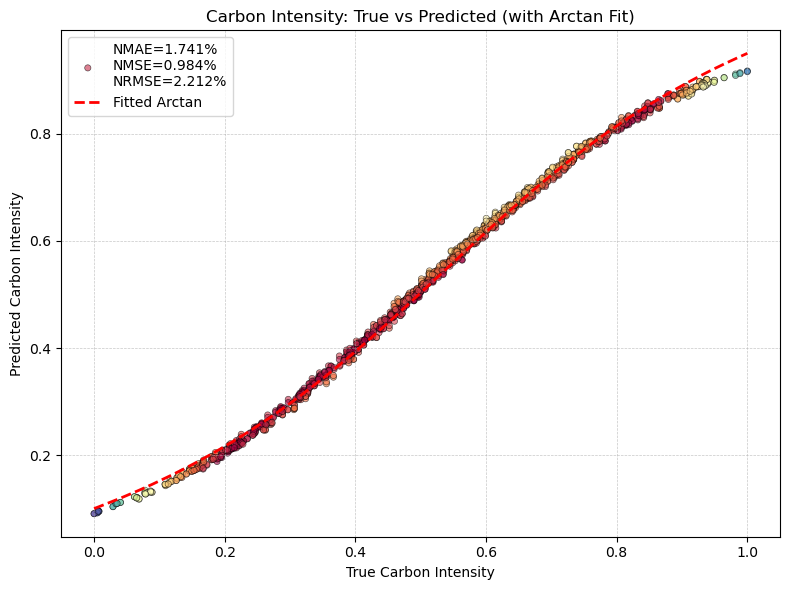

In [62]:
plot_carbon_intensity_arctanfit(real=real_2, pred=pred_2, features=features, target=targets[1], percent=True)

In [56]:
# V Focalizzare su cooling_demand e calcolare errori normalizzati per confrontare coi modelli già visti
# V Fare addestramento su building 1 e valutare su building 2 e 3
# V Cambiare target su carbon_intensity e solar_generation
# Cambiare e testare nuove architetture per Autoencoder